# My Ugly Solutions

## [138. Copy List with Random Pointer](https://leetcode.com/problems/copy-list-with-random-pointer/)

Medium

A linked list of length n is given such that each node contains an additional random pointer, which could point to any node in the list, or null.

Construct a deep copy of the list. The deep copy should consist of exactly n brand new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes X and Y in the original list, where X.random --> Y, then for the corresponding two nodes x and y in the copied list, x.random --> y.

Return the head of the copied linked list.

The linked list is represented in the input/output as a list of n nodes. Each node is represented as a pair of [val, random_index] where:

    val: an integer representing Node.val
    random_index: the index of the node (range from 0 to n-1) that the random pointer points to, or null if it does not point to any node.

Your code will only be given the head of the original linked list.

Example 1:

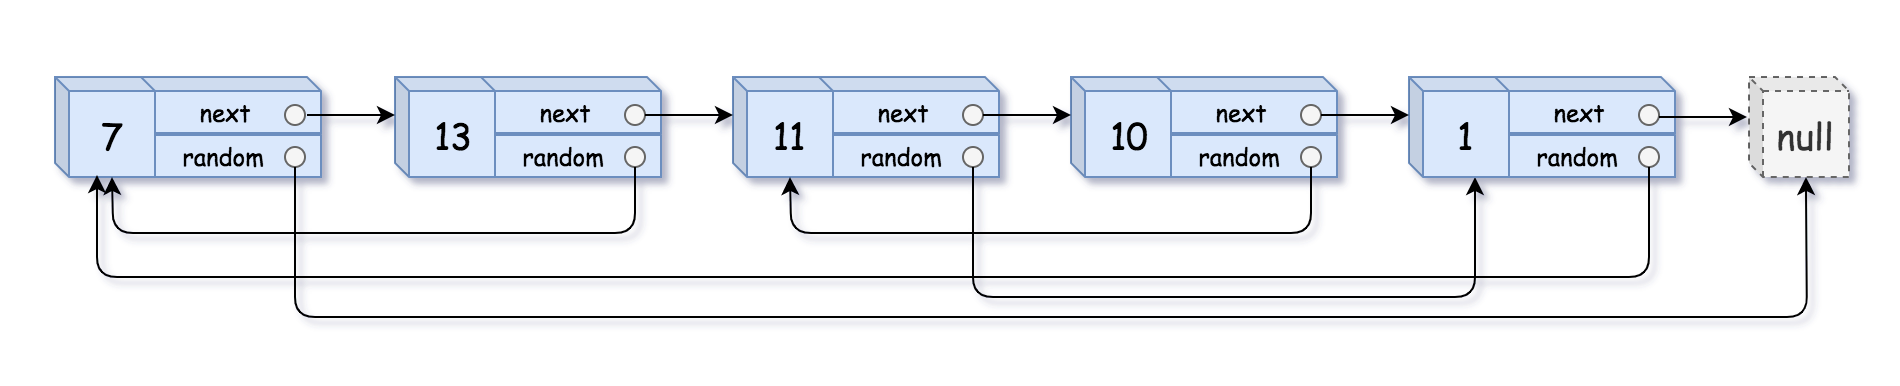

    Input: head = [[7,null],[13,0],[11,4],[10,2],[1,0]]
    Output: [[7,null],[13,0],[11,4],[10,2],[1,0]]

Constraints:

    0 <= n <= 1000
    -10000 <= Node.val <= 10000
    Node.random is null or is pointing to some node in the linked list.

In [1]:
# 第一個迴圈裡做三件事：
# 1. 記下當前 node 的 random 的 id（randIds）
# 2. 記下當前 node 的 id 和 idx（id2idx）
# 3. 複製當前 node 並放進一個 list 裡
# 
# 第一個迴圈結束之後得到
# randIds: [9788560, 140495150944320, 140495150946768, 140495150946240, 140495150944320]
# id2idx: {140495150944320: 0, 140495150945808: 1, 140495150946240: 2, 140495150946432: 3, 140495150946768: 4}
#
# 第二個迴圈根據這些資訊 assign random

def copyRandomList(head):
    cur = head
    copy_dummy = copy_cur = Node(0)

    randIds = []
    id2idx = {}
    ptrs = []
    i = 0
    while cur:
        randIds.append(id(cur.random))
        id2idx[id(cur)] = i
        
        copy_cur.next = Node(x=cur.val)
        cur = cur.next
        copy_cur = copy_cur.next
        ptrs.append(copy_cur)
        i += 1

    copy_cur = copy_dummy.next
    i = 0
    while copy_cur:
        copy_cur.random = ptrs[id2idx[randIds[i]]] if randIds[i] in id2idx else None
        copy_cur = copy_cur.next
        i += 1

    return copy_dummy.next

## 752. Open the Lock

Medium

You have a lock in front of you with 4 circular wheels. Each wheel has 10 slots: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'. The wheels can rotate freely and wrap around: for example we can turn '9' to be '0', or '0' to be '9'. Each move consists of turning one wheel one slot.

The lock initially starts at '0000', a string representing the state of the 4 wheels.

You are given a list of deadends dead ends, meaning if the lock displays any of these codes, the wheels of the lock will stop turning and you will be unable to open it.

Given a target representing the value of the wheels that will unlock the lock, return the minimum total number of turns required to open the lock, or -1 if it is impossible.
 

Example 1:

    Input: deadends = ["0201","0101","0102","1212","2002"], target = "0202"
    Output: 6
    Explanation:
    A sequence of valid moves would be "0000" -> "1000" -> "1100" -> "1200" -> "1201" -> "1202" -> "0202".
    Note that a sequence like "0000" -> "0001" -> "0002" -> "0102" -> "0202" would be invalid,
    because the wheels of the lock become stuck after the display becomes the dead end "0102".
 

Constraints:

    1 <= deadends.length <= 500
    deadends[i].length == 4
    target.length == 4
    target will not be in the list deadends.
    target and deadends[i] consist of digits only.



In [4]:
deadends = ["0201","0101","0102","1212","2002"]
target = "0202"

def openLock(deadends, target):
    
    if '0000' in deadends:
        return -1
    
    digitNeighbors = {'0': ['1', '9'], 
        '1': ['2', '0'], '2': ['3', '1'], '3': ['4', '2'], 
        '4': ['5', '3'], '5': ['6', '4'], '6': ['7', '5'], 
        '7': ['8', '6'], '8': ['9', '7'], '9': ['0', '8']}

    def getNeighbors(comb):
        res = set([])
        for i in range(len(comb)):
            a, b = digitNeighbors[comb[i]]
            c = list(comb)
            c[i] = a
            res.add(''.join(c))
            c[i] = b
            res.add(''.join(c))
        return res

    nsteps = {deadend: -1 for deadend in deadends}
    rest = set('%04d'%i for i in range(10000)) - set(deadends)
    combs = set(['0000'])
    n = 0

    while rest:
        rest -= combs
        for comb in combs:
            nsteps[comb] = n
        
        n += 1
        combs = set().union(*[getNeighbors(comb) for comb in combs]) & rest
        
        if target in nsteps:
            return nsteps[target]
        
        if not combs:
            return -1
    
openLock(deadends, target)

6

## 259. 3Sum Smaller

Medium

Given an array of n integers nums and an integer target, find the number of index triplets i, j, k with 0 <= i < j < k < n that satisfy the condition nums[i] + nums[j] + nums[k] < target.

Follow up: Could you solve it in O(n^2) runtime?


Example 1:

    Input: nums = [-2,0,1,3], target = 2
    Output: 2
    Explanation: Because there are two triplets which sums are less than 2:
    [-2,0,1]
    [-2,0,3]

Constraints:

    n == nums.length
    0 <= n <= 300
    -100 <= nums[i] <= 100
    -100 <= target <= 100

In [1]:
# brute force O(n^3) solution accepted!

nums = [-2,0,1,3]
target = 2

def threeSumSmaller(nums, target):
    return sum([1 for k in range(len(nums)) for j in range(k) for i in range(j) if nums[i]+nums[j]+nums[k] < target])

threeSumSmaller(nums, target)

2

## 588. Design In-Memory File System
Hard

Design an in-memory file system to simulate the following functions:

* ```ls```: Given a path in string format. If it is a file path, return a list that only contains this file's name. If it is a directory path, return the list of file and directory names in this directory. Your output (file and directory names together) should in lexicographic order.
* ```mkdir```: Given a directory path that does not exist, you should make a new directory according to the path. If the middle directories in the path don't exist either, you should create them as well. This function has void return type.
* ```addContentToFile```: Given a file path and file content in string format. If the file doesn't exist, you need to create that file containing given content. If the file already exists, you need to append given content to original content. This function has void return type.
* ```readContentFromFile```: Given a file path, return its content in string format.

Example:

    Input: 
    ["FileSystem","ls","mkdir","addContentToFile","ls","readContentFromFile"]
    [[],["/"],["/a/b/c"],["/a/b/c/d","hello"],["/"],["/a/b/c/d"]]

    Output:
    [null,[],null,null,["a"],"hello"]

    Explanation:

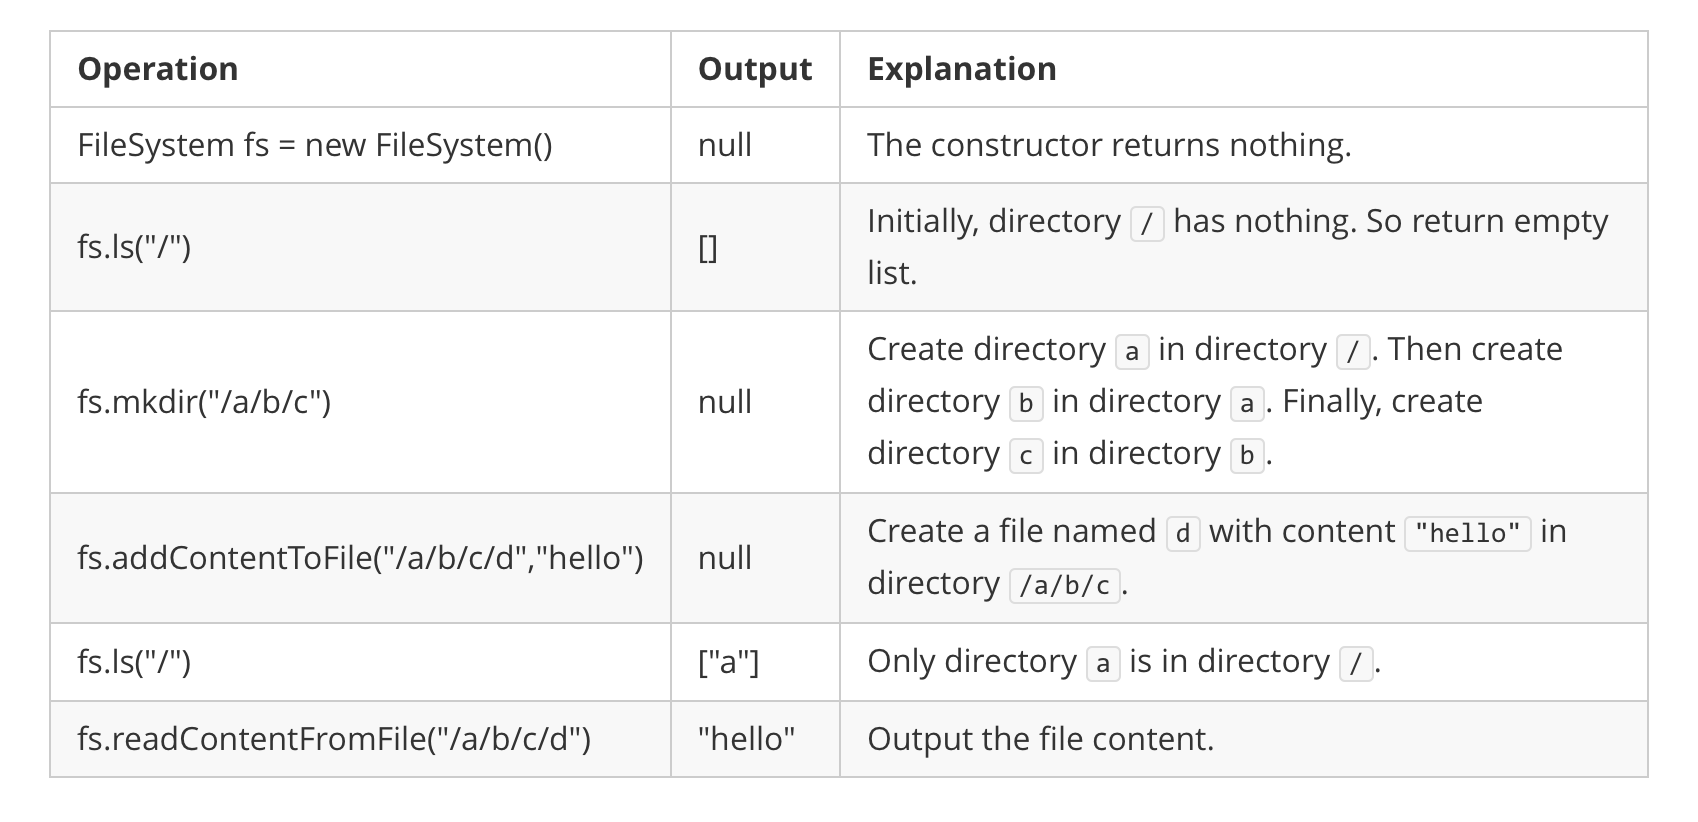

Note:

1. You can assume all file or directory paths are absolute paths which begin with / and do not end with / except that the path is just "/".
1. You can assume that all operations will be passed valid parameters and users will not attempt to retrieve file content or list a directory or file that does not exist.
1. You can assume that all directory names and file names only contain lower-case letters, and same names won't exist in the same directory.



In [3]:
class FileSystem:
    def __init__(self):
        self.fs = {}
        self.head = self.fs

    def cd(self, path=None):
        if path is None:
            self.head = self.fs
            return 
        for directory in path.split('/'): 
            if len(directory):
                self.head = self.head[directory]
        
    def ls(self, path):
        self.cd()
        if path=='/':
            return sorted(self.fs.keys())
        directory = '/'.join(path.split('/')[:-1])
        filename = path.split('/')[-1]
        self.cd(directory)
        if isinstance(self.head[filename], dict):
            return sorted(self.head[filename].keys())
        else:
            return [filename]

    def mkdir(self, path):
        self.cd()
        for directory in path.split('/'): 
            if directory == '': 
                continue    
            if directory not in self.head:    
                self.head[directory] = {} 
            self.cd(directory)
        self.cd()

    def addContentToFile(self, filePath, content):
        directory = '/'.join(filePath.split('/')[:-1])
        filename = filePath.split('/')[-1]
        self.mkdir(directory)
        self.cd(directory)
        if filename in self.head:
            self.head[filename] += content
        else:
            self.head[filename] = content
        
    def readContentFromFile(self, filePath):
        self.cd()
        self.cd(filePath)
        return self.head

    
from pandas import DataFrame

methods = ["FileSystem","mkdir","ls","mkdir","ls","ls","ls","addContentToFile","ls","ls","ls"]
argList = [[],["/m"],["/m"],["/w"],["/"],["/w"],["/"],["/dycete","emer"],["/w"],["/"],["/dycete"]]

fs = FileSystem()
DataFrame([(method, args, getattr(fs, method)(*args)) for method, args in zip(methods[1:], argList[1:])], columns=['method', 'args', 'result'])

,method,args,result
0,mkdir,[/m],None
1,ls,[/m],[]
2,mkdir,[/w],None
3,ls,[/],"[m, w]"
4,ls,[/w],[]
5,ls,[/],"[m, w]"
6,addContentToFile,"[/dycete, emer]",None
7,ls,[/w],[]
8,ls,[/],"[dycete, m, w]"
9,ls,[/dycete],[dycete]


## 460. LFU Cache

Hard

Design and implement a data structure for a Least Frequently Used (LFU) cache.

Implement the LFUCache class:

* ```LFUCache(int capacity)``` Initializes the object with the ```capacity``` of the data structure.
* ```int get(int key)``` Gets the value of the ```key``` if the ```key``` exists in the cache. Otherwise, returns -1.
* ```void put(int key, int value)``` Update the value of the ```key``` if present, or inserts the ```key``` if not already present. When the cache reaches its ```capacity```, it should invalidate and remove the least frequently used key before inserting a new item. For this problem, when there is a tie (i.e., two or more keys with the same frequency), the least recently used ```key``` would be invalidated.

To determine the least frequently used key, a use counter is maintained for each key in the cache. The key with the smallest use counter is the least frequently used key.

When a key is first inserted into the cache, its use counter is set to 1 (due to the put operation). The use counter for a key in the cache is incremented either a get or put operation is called on it.

 

Example 1:

    Input
    ["LFUCache", "put", "put", "get", "put", "get", "get", "put", "get", "get", "get"]
    [[2], [1, 1], [2, 2], [1], [3, 3], [2], [3], [4, 4], [1], [3], [4]]
    Output
    [null, null, null, 1, null, -1, 3, null, -1, 3, 4]

    Explanation
    // cnt(x) = the use counter for key x
    // cache=[] will show the last used order for tiebreakers (leftmost element is  most recent)
    LFUCache lfu = new LFUCache(2);
    lfu.put(1, 1);   // cache=[1,_], cnt(1)=1
    lfu.put(2, 2);   // cache=[2,1], cnt(2)=1, cnt(1)=1
    lfu.get(1);      // return 1
                     // cache=[1,2], cnt(2)=1, cnt(1)=2
    lfu.put(3, 3);   // 2 is the LFU key because cnt(2)=1 is the smallest, invalidate 2.
                     // cache=[3,1], cnt(3)=1, cnt(1)=2
    lfu.get(2);      // return -1 (not found)
    lfu.get(3);      // return 3
                     // cache=[3,1], cnt(3)=2, cnt(1)=2
    lfu.put(4, 4);   // Both 1 and 3 have the same cnt, but 1 is LRU, invalidate 1.
                     // cache=[4,3], cnt(4)=1, cnt(3)=2
    lfu.get(1);      // return -1 (not found)
    lfu.get(3);      // return 3
                     // cache=[3,4], cnt(4)=1, cnt(3)=3
    lfu.get(4);      // return 4
                     // cache=[3,4], cnt(4)=2, cnt(3)=3

Constraints:

    0 <= capacity, key, value <= 10^4
    At most 10^5 calls will be made to get and put.

 
Follow up: Could you do both operations in O(1) time complexity?

In [3]:
# 5% solution 因為做太多次 swap
# 把 items 和對應的 freq 存在一個 doubly linked list 裡，然後用 hash table 存指標指向 nodes
# head 指向頻率最低的 node（linked list 的最左邊，最先被刪除）
# 每次 freq 遞增完之後要一路 swap 到同 freq 的最右邊，因為這個 node 變成 most recently used
# 而且這裡的寫法是一步一步 swap 而非一次 swap 到最右邊，所以才這麼慢
# 就算要一次 swap 到位，還是要花 O(n) 時間找到要 swap 的位子，還是快不起來。n 是同 freq 的 node 數

# LeetCode 上最快的寫法是每一個 freq 都用一個 doubly linked list 來存，真正做到 O(1) update_freq

class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.freq = 0
        self.prev = None
        self.next = None

class LFUCache(dict):
    def __init__(self, capacity):
        self.capacity = capacity
        self.head = None
        
    def update_freq(self, key):
        '''
        Increase freq of key by 1 and adjust note order in the linked list if necessary
        This method assumes key is in the cache
        '''
        self[key].freq += 1
        
        while self[key].next and self[key].next.freq <= self[key].freq:
            # swap self[key] and self[key].next

            a = self[key]
            b = self[key].next
            prev_nbr = a.prev
            next_nbr = b.next

            if prev_nbr:
                prev_nbr.next = b

            if next_nbr:
                next_nbr.prev = a

            a.prev = b
            b.next = a
            a.next = next_nbr
            b.prev = prev_nbr

            if self.head.prev:
                self.head = self.head.prev

    def get(self, key):
        if self.capacity == 0: 
            return -1
        
        if key in self:
            self.update_freq(key)
            return self[key].value
        else:
            return -1
        
    def put(self, key, value):
        if self.capacity == 0: 
            return 
        
        if key in self:
            self[key].value = value
            self.update_freq(key)
        else:
            if len(self) == self.capacity:
                keyToDelete = self.head.key
                self.head = self.head.next
                if self.head:
                    self.head.prev.next = None
                    self.head.prev = None
                del self[keyToDelete]
                    
            self[key] = Node(key, value)
            self[key].next = self.head
            if self.head:
                self.head.prev = self[key]
            self.head = self[key]    
            self.update_freq(key)
            
    def print_list(self):
        curr = self.head
        while curr:
            print(curr.prev, curr.key, curr.value, curr.next)
            curr = curr.next
        print()
            
from pandas import DataFrame

methods = ["LFUCache","put","put","get","put","get","get","put","get","get","get"]
argList = [[2],[1,1],[2,2],[1],[3,3],[2],[3],[4,4],[1],[3],[4]]

fs = LFUCache(1)
DataFrame([(method, args, getattr(fs, method)(*args)) for method, args in zip(methods[1:], argList[1:])], columns=['method', 'args', 'result'])

,method,args,result
0,put,"[1, 1]",NaN
1,put,"[2, 2]",NaN
2,get,[1],-1.0
3,put,"[3, 3]",NaN
4,get,[2],-1.0
5,get,[3],3.0
6,put,"[4, 4]",NaN
7,get,[1],-1.0
8,get,[3],-1.0
9,get,[4],4.0
